# Formatting Eddy Data from MATLAB File

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fpath='/gscratch/jisao/mclaret/GL64/Juin_500m/'
f = h5py.File(fpath + 'eddy_tracks.mat')
print(list(f.keys()))

['#refs#', 'tracks', 'warn_tracks']


In [3]:
print(list(f['tracks']))

['Rd', 'aire1', 'aire2', 'aire3', 'calcul', 'dc', 'deta1', 'deta2', 'deta3', 'ellip1', 'ellip2', 'f', 'gama', 'ind', 'ind2', 'interaction', 'interaction2', 'large1', 'large2', 'nrho1', 'nrho2', 'nrho3', 'rmax1', 'rmax2', 'rmax3', 'shapes1', 'shapes2', 'shapes3', 'step', 'tau1', 'tau2', 'theta1', 'theta2', 'type', 'velmax1', 'velmax2', 'velmax3', 'weak', 'x1', 'x2', 'xbary1', 'xbary2', 'y1', 'y2', 'ybary1', 'ybary2']


In [39]:
print(f[f[data['shapes1'][0,0]][(0,0)]])
print(np.array(f[f[data['shapes1'][0,0]][(0,0)]]))

<HDF5 dataset "Kf": shape (47, 2), type "<f8">
[[ 7.90625    42.5124346 ]
 [ 7.89871818 42.52757864]
 [ 7.890625   42.54094756]
 [ 7.88789439 42.54319811]
 [ 7.875      42.55250726]
 [ 7.859375   42.55492622]
 [ 7.84375    42.55264066]
 [ 7.828125   42.54812119]
 [ 7.81536611 42.54319811]
 [ 7.8125     42.54202176]
 [ 7.796875   42.53412567]
 [ 7.78555919 42.52757864]
 [ 7.78125    42.52490148]
 [ 7.765625   42.51424777]
 [ 7.76241732 42.51195917]
 [ 7.75       42.5016898 ]
 [ 7.74318435 42.4963397 ]
 [ 7.734375   42.48703723]
 [ 7.72706847 42.48072023]
 [ 7.71875    42.4673853 ]
 [ 7.71644321 42.46510076]
 [ 7.71875    42.46227541]
 [ 7.734375   42.45297456]
 [ 7.74217319 42.44948129]
 [ 7.75       42.44834251]
 [ 7.765625   42.44459045]
 [ 7.78125    42.43857227]
 [ 7.7890754  42.43386182]
 [ 7.796875   42.43096161]
 [ 7.8125     42.42263441]
 [ 7.81895412 42.41824235]
 [ 7.828125   42.41364635]
 [ 7.84375    42.40480815]
 [ 7.84829169 42.40262288]
 [ 7.859375   42.39800163]
 [ 7.875

In [18]:
"""
import h5py
import numpy as np
fpath='/gscratch/jisao/mclaret/GL64/Juin_500m/'
f = h5py.File(fpath + 'eddy_tracks.mat') """

# Arrange data into a list of dictionaries
data = f['tracks']            # relevant variables
varnames = list(f['tracks'])  # variable names
ntracks = len(data['x1'])     # number of tracks (should match with length of data in 'x1')

tracks = []                   # initialize list of eddy tracks

# add dictionaries for each variable to the corresponding eddy index (0 - N-1)
for itrack in range(ntracks):
    variables = {var:[] for var in varnames}  # initialize a dictionary with each variable name
    for var in varnames:
        # go through each variable
        if var[0:6] == 'shapes':
            # translate shapes data to list of numpy arrays (one array for each time step)
            coordinates = []                             # initialize list of coordinates
            numSteps = len(f[data[var][itrack,0]][(0)])  # number of timesteps
            # each timestep has its own hdf5 object reference, so append each step to a list
            for step in range(numSteps):
                coords = np.array(f[f[data[var][itrack,0]][(0, step)]])
                coordinates.append(coords)
            variables[var] = coordinates
        else:
            # translate data from hdf5 object reference to numpy array
            variables[var] = np.array(f[data[var][itrack,0]][(0)])
    tracks.append(variables)
    
print('Number of eddies:', len(tracks))

Number of eddies: 43


In [37]:
# verify array data translated correctly
print(tracks[0]['x1'])
print(tracks[0]['y1'])
print('num steps for eddy 1:', len(tracks[0]['step']))
print('num steps for eddy 43:', len(tracks[42]['step']))

[7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375
 7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375  7.84375
 7.84375  7.84375  7.84375  7.828125 7.828125 7.828125 7.84375  7.84375 ]
[42.44948129 42.44948129 42.46510076 42.46510076 42.46510076 42.46510076
 42.46510076 42.46510076 42.46510076 42.44948129 42.44948129 42.44948129
 42.44948129 42.44948129 42.44948129 42.44948129 42.44948129 42.46510076
 42.46510076 42.48072023 42.48072023 42.48072023 42.48072023 42.48072023]
num steps for eddy 1: 24
num steps for eddy 43: 5


number of steps: 24
(47, 2)
(47, 2)
[[ 7.90625    42.5124346 ]
 [ 7.89871818 42.52757864]
 [ 7.890625   42.54094756]
 [ 7.88789439 42.54319811]
 [ 7.875      42.55250726]
 [ 7.859375   42.55492622]
 [ 7.84375    42.55264066]
 [ 7.828125   42.54812119]
 [ 7.81536611 42.54319811]
 [ 7.8125     42.54202176]
 [ 7.796875   42.53412567]
 [ 7.78555919 42.52757864]
 [ 7.78125    42.52490148]
 [ 7.765625   42.51424777]
 [ 7.76241732 42.51195917]
 [ 7.75       42.5016898 ]
 [ 7.74318435 42.4963397 ]
 [ 7.734375   42.48703723]
 [ 7.72706847 42.48072023]
 [ 7.71875    42.4673853 ]
 [ 7.71644321 42.46510076]
 [ 7.71875    42.46227541]
 [ 7.734375   42.45297456]
 [ 7.74217319 42.44948129]
 [ 7.75       42.44834251]
 [ 7.765625   42.44459045]
 [ 7.78125    42.43857227]
 [ 7.7890754  42.43386182]
 [ 7.796875   42.43096161]
 [ 7.8125     42.42263441]
 [ 7.81895412 42.41824235]
 [ 7.828125   42.41364635]
 [ 7.84375    42.40480815]
 [ 7.84829169 42.40262288]
 [ 7.859375   42.39800163]
 [ 7.875      42.39

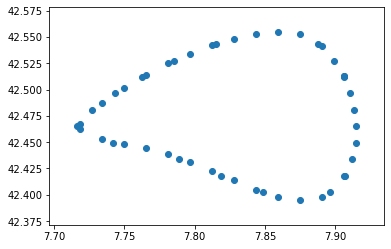

In [31]:
# verify shapes data translated correctly
print('number of steps:', len(tracks[0]['shapes1']))
print(tracks[0]['shapes1'][0].shape)
print(tracks[0]['shapes1'][23].shape)
print(tracks[0]['shapes1'][0]) # array of coordinates

# plot shape at time 0
coords = tracks[0]['shapes1'][0]
xs, ys = coords.T
plt.scatter(xs, ys)
plt.show()